In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()
df.to_csv("BA_reviews.csv")

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df = pd.read_csv('BA_reviews.csv')
df = df[['reviews']]
df['reviews'] = df['reviews'].str.strip()
df['reviews'] = df['reviews'].str.lower()
# Specify the words to remove
words_to_remove = ['trip', 'verified', ' U+2713']

# Remove the specified words from the "reviews" column
df['reviews'] = df['reviews'].str.replace('|'.join(words_to_remove), '', regex=True)

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))



,reviews
0,"not | i flew with numerous airlines, but i go..."
1,✅ | we were traveling as a family (5 people...
2,✅ | flight at 8.40am from dub to lcy cancell...
3,✅ | terrible. i have traveled twice with th...
4,✅ | the customer service is ugly. tried cal...
...,...
995,✅ | \r\nnew york to nairobi via london. fli...
996,✅ | istanbul to london heathrow. the plane ...
997,✅ | bad service and attitude all round. my ...
998,✅ | london to santiago de chile. i was flyi...


In [ ]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)
df['cleaned_review'] = df['reviews'].apply(remove_stopwords)


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
sid = SentimentIntensityAnalyzer()
def get_sentiment_score(text):
    return sid.polarity_scores(text)['compound']
df['sentiment_score'] = df['cleaned_review'].apply(get_sentiment_score)
df

,reviews,cleaned_review,sentiment_score
0,"not | i flew with numerous airlines, but i go...","| flew numerous airlines , got ta admit , brit...",-0.0026
1,✅ | we were traveling as a family (5 people...,✅ | traveling family ( 5 people ) . accident a...,0.3400
2,✅ | flight at 8.40am from dub to lcy cancell...,✅ | flight 8.40am dub lcy cancelled 1155pm nig...,-0.9126
3,✅ | terrible. i have traveled twice with th...,✅ | terrible . traveled twice year via busines...,-0.9382
4,✅ | the customer service is ugly. tried cal...,✅ | customer service ugly . tried calling two ...,-0.7184
...,...,...,...
995,✅ | \r\nnew york to nairobi via london. fli...,✅ | new york nairobi via london . flight atten...,0.9571
996,✅ | istanbul to london heathrow. the plane ...,"✅ | istanbul london heathrow . plane old , fou...",0.9442
997,✅ | bad service and attitude all round. my ...,✅ | bad service attitude round . fiasco flight...,-0.8126
998,✅ | london to santiago de chile. i was flyi...,✅ | london santiago de chile . flying premium ...,0.9585


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


In [ ]:
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(df['cleaned_review'])
lda_model = LatentDirichletAllocation(n_components=5)  # Set the number of topics
lda_model.fit(dtm)
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    print(f"Topic #{topic_idx+1}:")
    print([feature_names[i] for i in topic.argsort()[:-10:-1]])  # Print top 10 keywords per topic

Topic #1:
['flight', 'ba', 'class', 'food', 'seat', 'good', 'business', 'service', 'seats']
Topic #2:
['flight', 'crew', 'ba', 'service', 'london', 'cabin', 'time', 'seat', 'good']
Topic #3:
['ba', 'flight', 'refund', 'customer', 'us', 'british', 'airways', 'booked', 'would']
Topic #4:
['ba', 'us', 'flight', 'cabin', 'asked', 'seat', 'one', 'service', 'bag']
Topic #5:
['flight', 'ba', 'london', 'staff', 'check', 'service', 'hours', 'airport', 'would']


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


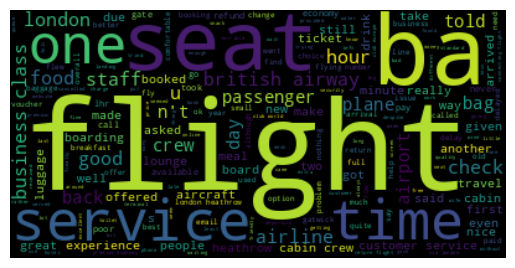

In [ ]:
text_concatenated = ' '.join(df['cleaned_review'])
wordcloud = WordCloud().generate(text_concatenated)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
df.drop('reviews', axis=1, inplace=True)

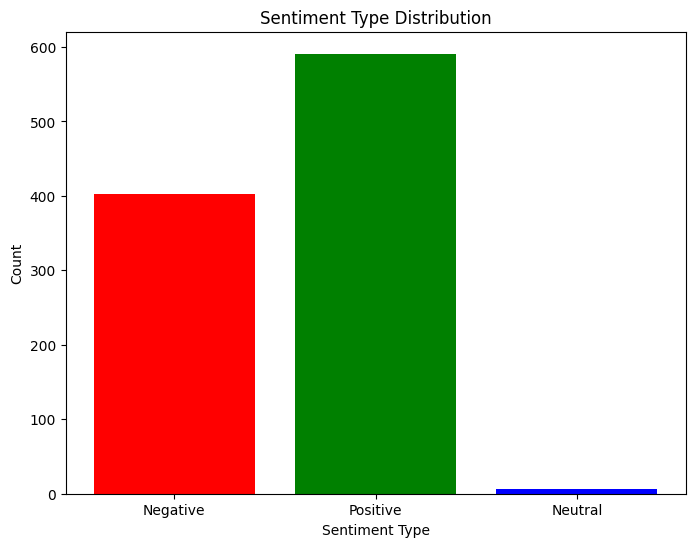

In [ ]:
import matplotlib.pyplot as plt

# Categorize sentiment scores
negative_count = len(df[df['sentiment_score'] < 0])
positive_count = len(df[df['sentiment_score'] > 0])
neutral_count = len(df[df['sentiment_score'] == 0])

# Create labels and values for the sentiment types
sentiment_labels = ['Negative', 'Positive', 'Neutral']
sentiment_values = [negative_count, positive_count, neutral_count]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(sentiment_labels, sentiment_values, color=['red', 'green', 'blue'])
plt.title('Sentiment Type Distribution')
plt.xlabel('Sentiment Type')
plt.ylabel('Count')

# Display the chart
plt.show()


In [ ]:
df


,cleaned_review,sentiment_score,sentiment_category,sentiment
0,"| flew numerous airlines , got ta admit , brit...",-0.0026,NaN,Negative
1,✅ | traveling family ( 5 people ) . accident a...,0.3400,NaN,Positive
2,✅ | flight 8.40am dub lcy cancelled 1155pm nig...,-0.9126,NaN,Negative
3,✅ | terrible . traveled twice year via busines...,-0.9382,NaN,Negative
4,✅ | customer service ugly . tried calling two ...,-0.7184,NaN,Negative
...,...,...,...,...
995,✅ | new york nairobi via london . flight atten...,0.9571,NaN,Positive
996,"✅ | istanbul london heathrow . plane old , fou...",0.9442,NaN,Positive
997,✅ | bad service attitude round . fiasco flight...,-0.8126,NaN,Negative
998,✅ | london santiago de chile . flying premium ...,0.9585,check_in_services,Positive
